# NumPy Lesson

This lesson shows how to use NumPy.

Feb. 10, 2022

In [1]:
import numpy

In [2]:
help(numpy.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes', *, like=None)
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strin

In [3]:
import os

# Build file path
distance_file = os.path.join("data", "distance_data_headers.csv")

distances = numpy.genfromtxt(distance_file, delimiter=",", dtype="unicode")
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [4]:
# distances is a numpy array
type(distances)

numpy.ndarray

In [6]:
# We can slice a NumPy array
headers = distances[0]
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [8]:
# Take a slice of the NumPy array that is only the numbers (everything but the headers)
# To do a slice list[start:stop]
data = distances[1:]
print(data)
print(len(data))

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]
10000


In [9]:
data

array([['1', '8.9542', '5.8024', '11.5478', '9.9557'],
       ['2', '8.6181', '6.0942', '13.9594', '11.6945'],
       ['3', '9.0066', '6.0637', '13.0924', '11.3043'],
       ...,
       ['9998', '8.6625', '7.7306', '9.5469', '10.3063'],
       ['9999', '9.2456', '7.8886', '9.8151', '10.7564'],
       ['10000', '8.8135', '7.917', '9.9517', '10.7848']], dtype='<U8')

In [10]:
# Make data into numbers (float = decimal number)
data = data.astype(numpy.float)

<ipython-input-10-1eebef5f0293>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = data.astype(numpy.float)


In [11]:
# Can use two numbers to slice a numpy array
# array_name[row_number, column_number]

print(data[0, 1])

8.9542


In [12]:
# Think about what the output of this code will be
print(data[1, 0])
print(data[2, 2])

2.0
6.0637


In [13]:
small_data = data[0:10, 0:3]
print(small_data)

[[ 1.      8.9542  5.8024]
 [ 2.      8.6181  6.0942]
 [ 3.      9.0066  6.0637]
 [ 4.      9.2002  6.0227]
 [ 5.      9.1294  5.9365]
 [ 6.      9.0462  6.2553]
 [ 7.      8.8657  5.9186]
 [ 8.      9.3256  6.2351]
 [ 9.      9.4184  6.1993]
 [10.      9.06    6.0478]]


In [14]:
print(small_data[5, :])
print(small_data[:, 1:])

[6.     9.0462 6.2553]
[[8.9542 5.8024]
 [8.6181 6.0942]
 [9.0066 6.0637]
 [9.2002 6.0227]
 [9.1294 5.9365]
 [9.0462 6.2553]
 [8.8657 5.9186]
 [9.3256 6.2351]
 [9.4184 6.1993]
 [9.06   6.0478]]


In [15]:
# data_average = numpy.mean(data_to_take_mean_of)
thr4_atp = data[:, 1]
print(thr4_atp)

[8.9542 8.6181 9.0066 ... 8.6625 9.2456 8.8135]


In [16]:
avg_thr4_atp = numpy.mean(thr4_atp)
print(avg_thr4_atp)

10.876950930000001


In [17]:
# Hint - It might be useful to use your headers variable
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [18]:
# Write some code to figure out the number of columns in data
num_columns = len(headers)
print(num_columns)

5


In [24]:
for i in range(num_columns):
    column = data[:, i]
    col_header = headers[i]
    avg_col = numpy.mean(column)
    print(F"{col_header} : {avg_col:.3f}")

Frame : 5000.500
THR4_ATP : 10.877
THR4_ASP : 7.342
TYR6_ATP : 11.210
TYR6_ASP : 10.993


# Plotting

This part will show how to plot using the Python library matplotlib.

In [25]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


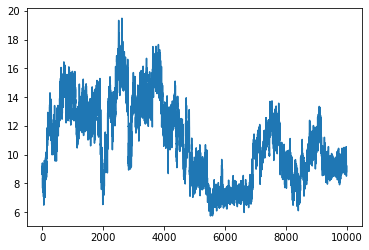

In [26]:
# Create a new plot
plt.figure()
plt.plot(data[:, 1])

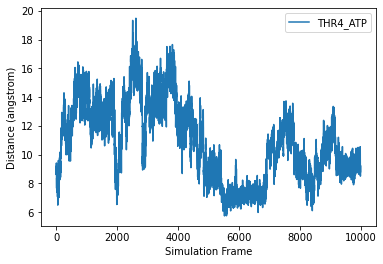

In [32]:
# Create a better plot
plt.figure()
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstrom)")
plt.plot(data[:, 1], label=headers[1])

plt.legend()
plt.savefig("my_plot_hq.png", dpi=300)

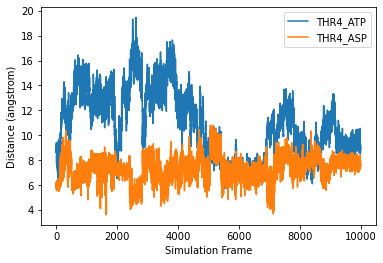

In [33]:
# Create a plot with multiple lines
plt.figure()
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstrom)")
plt.plot(data[:, 1], label=headers[1])
plt.plot(data[:, 2], label=headers[2])

plt.legend()
plt.savefig("my_plot_hq_2_lines.png", dpi=300)

In [34]:
num_columns

5

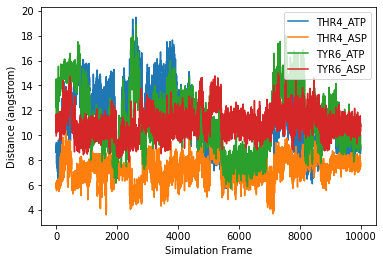

In [38]:
plt.figure()

for col in range(1, num_columns):
    plt.plot(data[:, col], label=headers[col])
    
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstrom)")
plt.legend()
plt.savefig("all_samples.png")

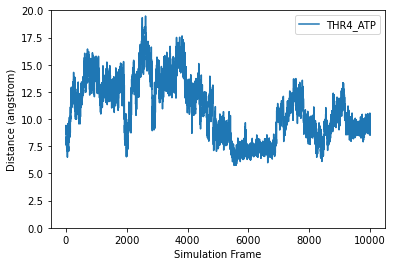

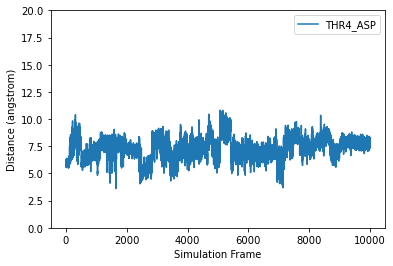

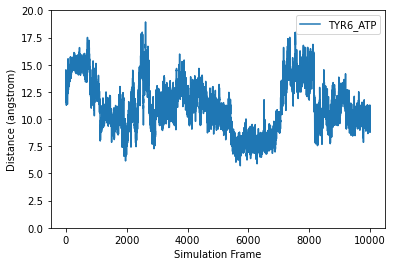

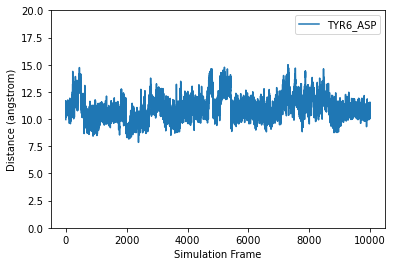

In [42]:
# Challenge - Modify this code so that you make a figure for each column.
# Extra bonus - how can you save an image for each plot?
for col in range(1, num_columns):
    plt.figure()
    plt.plot(data[:, col], label=headers[col])
    plt.xlabel("Simulation Frame")
    plt.ylabel("Distance (angstrom)")
    plt.legend()
    plt.ylim(0, 20)
    plt.savefig(F"{headers[col]}.png", dpi=200)
#plt.savefig("all_samples.png")

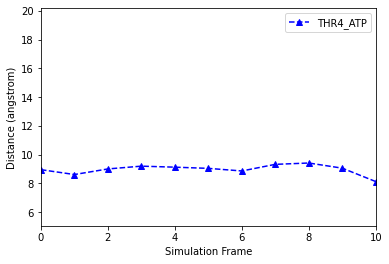

In [50]:
plt.figure()

plt.plot(data[:, 1],'--^b',label=headers[1], )

plt.xlim(0, 10)    
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstrom)")
plt.legend()
plt.savefig("all_samples.png")
